In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Distributions

array([0.99993772])

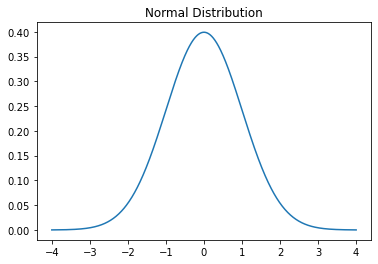

In [6]:
#Gaussian
n = 1001

x = np.linspace(-4, 4, n)
dist = stats.norm.pdf(x)

plt.plot(x, dist)
plt.title('Normal Distribution');

#Scale
scaled = sum(dist) * np.diff(x[:2])
scaled

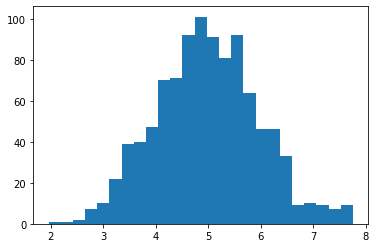

In [10]:
#Normaly-distributed random

var = 1
mu = 5
n = 1000

data = var * np.random.randn(n) + mu

plt.hist(data, bins = 25);

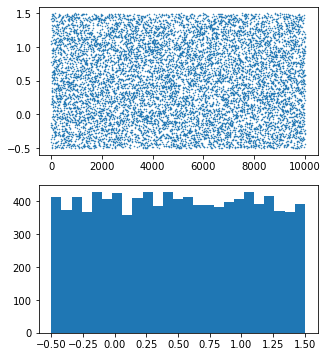

In [12]:
#Uniform distribution

var = 2
mu = .5
n = 10000

data = var * np.random.rand(n) + mu - var / 2

fig, ax = plt.subplots(2, 1, figsize = (5, 6))

#Uniform values
ax[0].plot(data, '.', markersize = 1);
#Uniform histogram
ax[1].hist(data, bins = 25);

Text(0.5, 1.0, 'Generated log-normal dist')

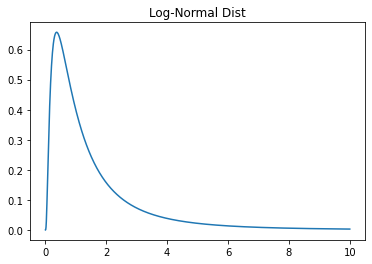

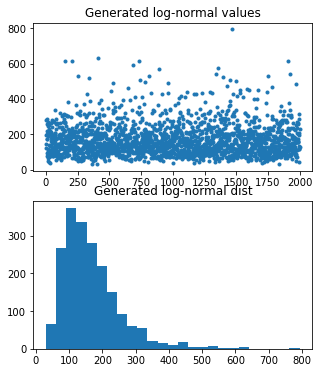

In [17]:
#Log-normal

n = 1001
x = np.linspace(0, 10, n)
dist = stats.lognorm.pdf(x, 1)

plt.plot(x, dist)
plt.title('Log-Normal Dist')


#Empirical log-normal

var = .5
mu = 5
n = 2000

data = var * np.random.randn(n) + mu
data = np.exp(data)

fig, ax = plt.subplots(2, 1, figsize = (5, 6))

#Uniform values
ax[0].plot(data, '.');
ax[0].set_title('Generated log-normal values')
#Uniform histogram
ax[1].hist(data, bins = 25);
ax[1].set_title('Generated log-normal dist')

Text(0.5, 1.0, 'Binomal dist (n = 10, p = 0.5)')

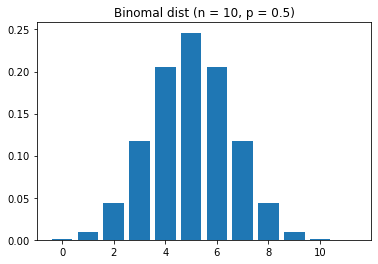

In [19]:
#Binomial

n = 10
p = .5

x = range(n + 2)
dist = stats.binom.pmf(x, n, p)

plt.bar(x, dist)
plt.title(f'Binomal dist (n = {n}, p = {p})')

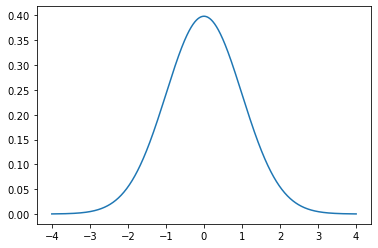

In [21]:
#t-dist

x = np.linspace(-4, 4, 1001)
df = 200
t = stats.t.pdf(x, df)

plt.plot(x, t);

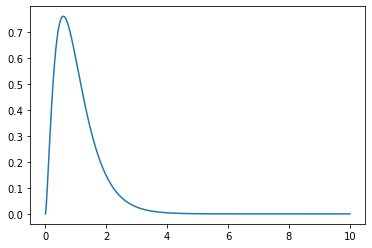

In [30]:
#f-dist

num_df = 5
den_df = 100

x = np.linspace(0, 10, 10001)

dist = stats.f.pdf(x, num_df, den_df)

plt.plot(x, dist);

# Measures of Central Tendency

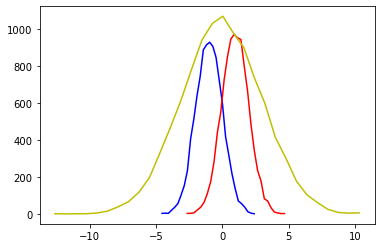

In [4]:
n = 10001
bins = 30

d1 = np.random.randn(n) - 1
d2 = np.random.randn(n) + 1
d3 = 3 * np.random.randn(n)

y1, x1 = np.histogram(d1, bins)
x1 = (x1[1:] + x1[:-1]) / 2

y2, x2 = np.histogram(d2, bins)
x2 = (x2[1:] + x2[:-1]) / 2

y3, x3 = np.histogram(d3, bins)
x3 = (x3[1:] + x3[:-1]) / 2

plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'y')

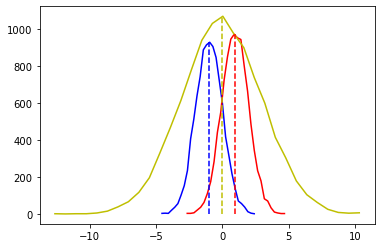

In [6]:
#Overlay mean
d1_mean = np.mean(d1)
d2_mean = np.mean(d2)
d3_mean = np.mean(d3)

plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'y')
plt.plot([d1_mean, d1_mean], [0, max(y1)], 'b--')
plt.plot([d2_mean, d2_mean], [0, max(y2)], 'r--')
plt.plot([d3_mean, d3_mean], [0, max(y3)], 'y--')

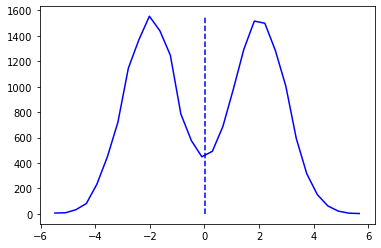

In [8]:
#Misleading usage of mean
d4 = np.hstack( (np.random.randn(n)-2,np.random.randn(n)+2) )
[y4,x4] = np.histogram(d4,bins)
x4 = (x4[:-1]+x4[1:])/2

mean_d4 = np.mean(d4)


plt.plot(x4,y4,'b')
plt.plot([mean_d4,mean_d4],[0,max(y4)],'b--')

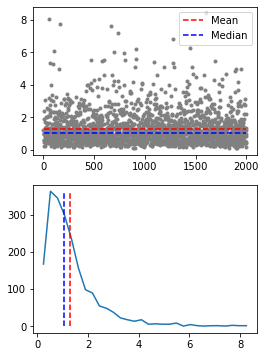

In [11]:
#Median

#Log normal dist
shift   = 0
std = .7
n       = 2000
nbins   = 50

data = std * np.random.randn(n) + shift
data = np.exp(data)

y,x = np.histogram(data,bins)
x = (x[:-1]+x[1:])/2

mean = np.mean(data)
median = np.median(data)

fig,ax = plt.subplots(2,1,figsize=(4,6))

ax[0].plot(data,'.', color=[.5,.5,.5])
ax[0].plot([1,n], [mean, mean], 'r--', label='Mean')
ax[0].plot([1,n], [median, median], 'b--', label='Median')
ax[0].legend()

ax[1].plot(x,y)
ax[1].plot([mean, mean], [0, max(y)], 'r--')
ax[1].plot([median, median],[0,max(y)],'b--');

In [13]:
#Mode
data = np.round(np.random.randn(10))

unique = np.unique(data)
for i in range(len(unique)):
    print(f'{unique[i]} appears {sum(data == unique[i])} times.')

print(' ')
print('The mode is %g'%stats.mode(data)[0][0])

-1.0 appears 5 times.
0.0 appears 3 times.
1.0 appears 2 times.
 
The mode is -1


# Dispersion

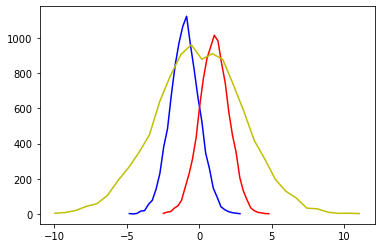

In [14]:
n = 10001
bins = 30

d1 = np.random.randn(n) - 1
d2 = np.random.randn(n) + 1
d3 = 3 * np.random.randn(n)

# need their histograms
y1,x1 = np.histogram(d1, bins)
x1 = (x1[1:] + x1[:-1]) / 2

y2,x2 = np.histogram(d2, bins)
x2 = (x2[1:] + x2[:-1]) / 2

y3,x3 = np.histogram(d3, bins)
x3 = (x3[1:] + x3[:-1]) / 2

plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'y')

In [17]:
mean = 10.2
stf  = 7.5
n_samp = 123

np.random.normal(mean, std, n_samp)

#Same as above
np.random.randn(n_samp) * std + mean

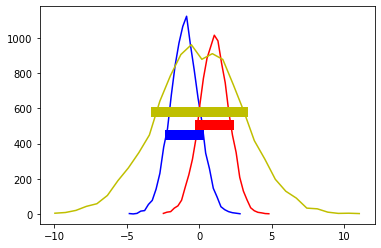

In [19]:
#Overlay std
stds = np.zeros(3)

stds[0] = np.std(d1, ddof = 1)
stds[1] = np.std(d2, ddof = 1)
stds[2] = np.std(d3, ddof = 1)

plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'y')

plt.plot([np.mean(d1) - stds[0], np.mean(d1) + stds[0]], [.4 * max(y1), .4 * max(y1)], 'b', linewidth=10)
plt.plot([np.mean(d2) - stds[1], np.mean(d2) + stds[1]], [.5 * max(y2), .5 * max(y2)], 'r', linewidth=10)
plt.plot([np.mean(d3) - stds[2], np.mean(d3) + stds[2]], [.6 * max(y3), .6 * max(y3)], 'y', linewidth=10);

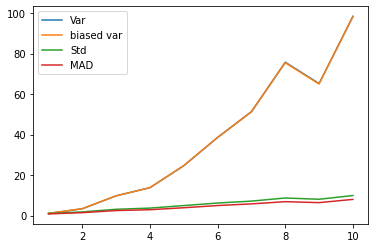

In [20]:
#Different measures of variance

variances = np.arange(1,11)
n = 300

varmeasures = np.zeros((4, len(variances)))

for i in range(len(variances)):
    #Data and mean
    data = np.random.randn(n) * variances[i]
    center = data - np.mean(data)
    
    #Variance
    varmeasures[0, i] = sum(center ** 2) / (n - 1)  
    #"Biased" variance
    varmeasures[1, i] = sum(center ** 2) / n
    #Std
    varmeasures[2, i] = np.sqrt(sum(center ** 2) / (n - 1))
    #Mean absolute diff.
    varmeasures[3, i] = sum(abs(center)) / (n - 1)
    

plt.plot(variances, varmeasures.T)
plt.legend(('Var','biased var','Std','MAD'))
plt.show()